In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurar estilo
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# Rutas de archivos
results_path = os.path.abspath(os.path.join("..", "results_docker"))
csv_path = os.path.join(results_path, "docker_scenarios_results.csv")

# Cargar datos
df_vm = pd.read_csv(csv_path)
df_vm['timestamp'] = pd.to_datetime(df_vm['timestamp'], format="%Y%m%d_%H%M%S")

# Mostrar últimos resultados
display(df_vm.tail())

,timestamp,test_type,cpu_percent,memory_percent,execution_time_sec,source
85,2025-05-17 18:43:40,memory_large,0.00,12.00,1.233085,docker
86,2025-05-17 18:43:43,disk_write,0.15,12.00,1.501260,docker
87,2025-05-17 18:43:47,disk_read,0.00,12.00,1.730709,docker
88,2025-05-17 18:43:49,network_download,0.00,12.00,0.106517,docker
89,2025-05-17 18:43:56,process_spawn,0.05,12.05,5.040957,docker


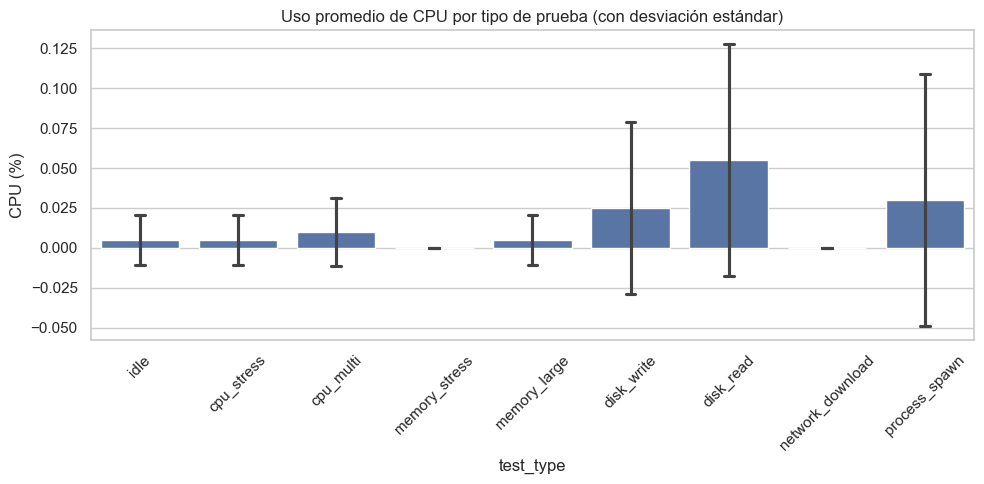

In [3]:
plt.figure()
sns.barplot(data=df_vm, x="test_type", y="cpu_percent", errorbar='sd', capsize=0.1)
plt.title("Uso promedio de CPU por tipo de prueba (con desviación estándar)")
plt.ylabel("CPU (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

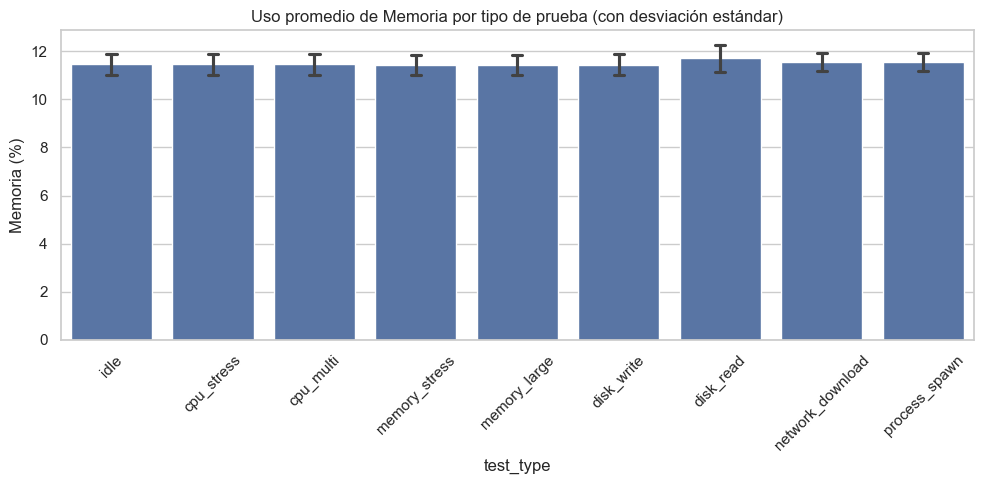

In [4]:
plt.figure()
sns.barplot(data=df_vm, x="test_type", y="memory_percent", errorbar='sd', capsize=0.1)
plt.title("Uso promedio de Memoria por tipo de prueba (con desviación estándar)")
plt.ylabel("Memoria (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

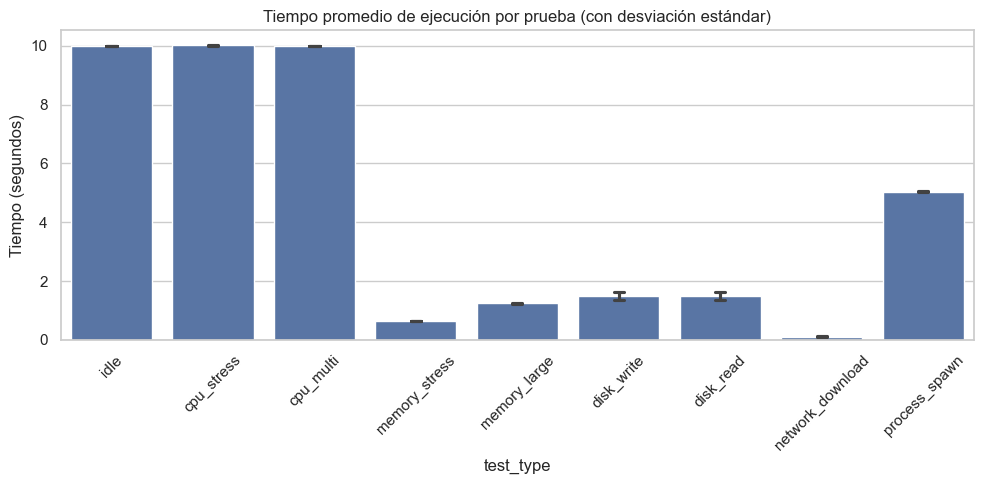

In [5]:
plt.figure()
sns.barplot(data=df_vm, x="test_type", y="execution_time_sec", errorbar='sd', capsize=0.1)
plt.title("Tiempo promedio de ejecución por prueba (con desviación estándar)")
plt.ylabel("Tiempo (segundos)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
grouped = df_vm.groupby("test_type").agg({
    "cpu_percent": ['mean', 'std'],
    "memory_percent": ['mean', 'std'],
    "execution_time_sec": ['mean', 'std']
}).round(2)

# Renombrar columnas para legibilidad
grouped.columns = ['CPU_mean', 'CPU_std', 'Mem_mean', 'Mem_std', 'Time_mean', 'Time_std']
display(grouped.sort_values("CPU_mean", ascending=False))

,CPU_mean,CPU_std,Mem_mean,Mem_std,Time_mean,Time_std
test_type,,,,,,
disk_read,0.06,0.07,11.70,0.55,1.49,0.14
process_spawn,0.03,0.08,11.56,0.38,5.04,0.01
disk_write,0.02,0.05,11.44,0.42,1.49,0.15
cpu_multi,0.01,0.02,11.44,0.44,10.01,0.00
cpu_stress,0.00,0.02,11.46,0.43,10.01,0.01
idle,0.00,0.02,11.46,0.43,10.01,0.00
memory_large,0.00,0.02,11.42,0.42,1.25,0.01
memory_stress,0.00,0.00,11.43,0.43,0.65,0.00
network_download,0.00,0.00,11.54,0.38,0.11,0.01
